# Capstone 2 Project: Regression Analysis for Predicting Compressive Strength of Concrete

In [26]:
import numpy as np 
import pandas as pd   
import seaborn as sns 
import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 


First step is to inspect the data 

In [28]:
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [29]:
df.info() # to check for null values and object type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [30]:
df.describe()  # 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Next step: I will drop duplicate records because i dont want it skew my prediction output and accuracy. 

In [23]:
df = df.drop(df[df.duplicated()].index) # to drop duplicate rows 
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [25]:
df.duplicated().sum()

0

Heat Map to determine the correlation among the features

Text(0.5, 1.0, 'correlaton amoung features on concrete mixture')

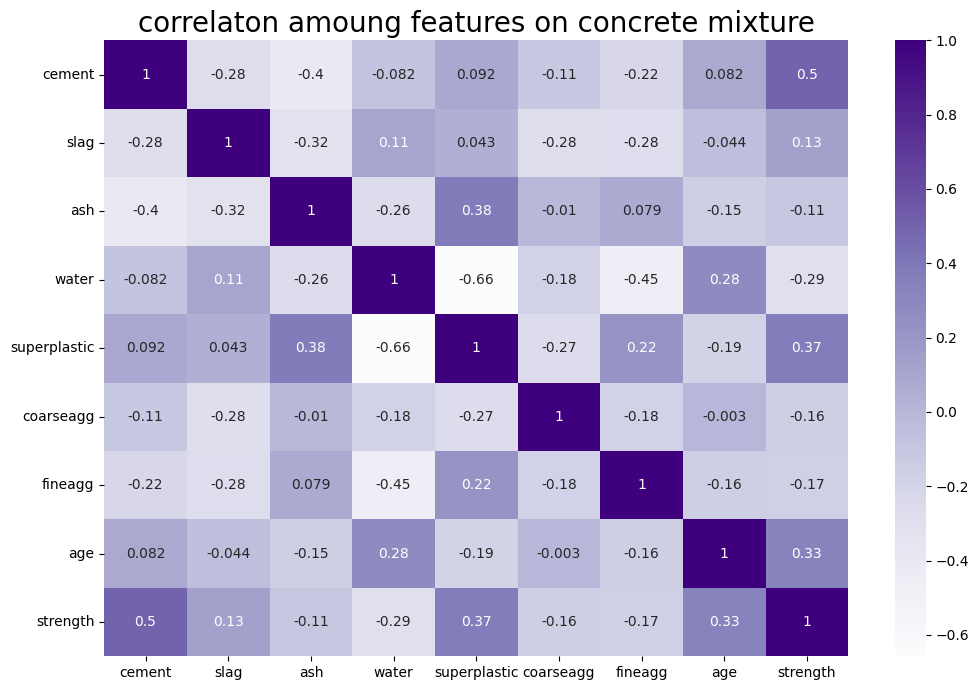

In [32]:

plt.figure(figsize=(12,8))

# We will creat a heatmap by calling .heatmap on sns(seaborn) library
sns.heatmap(df.corr(),annot=True,cmap='Purples') # correlation heatmap 

# We will set title by callig .title on the plot
plt.title('correlaton amoung features on concrete mixture',fontsize=20)

/var/folders/qq/95048pcd32d99x3hwp91gkv40000gn/T/ipykernel_49956/559588982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['strength'])


<Axes: xlabel='strength', ylabel='Density'>

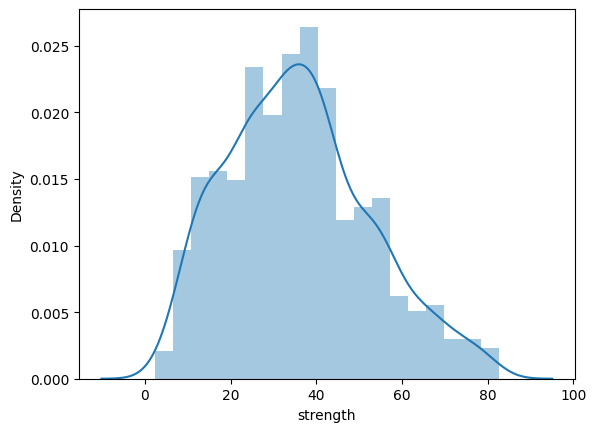

In [34]:
sns.distplot(df['strength']) # to check for distribution 

# MODEL 1: Linear regression

In [35]:
#Step 1 determine the features and Target 
X = df.drop('strength', axis=1)
y = df['strength']

In [36]:
# step 2 Data Split 
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25, random_state=0)

print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 


(772, 8)
(258, 8)
(772,)
(258,)


In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
linear_pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- Actual Target variable  
    y_pred:- model predicted Target values  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, linear_pred)

MSE:-  112.89680830914584
RMSE:-  10.62529097526961
R2_score:-  0.598224023981963


Text(0, 0.5, 'Actual data concrete strength')

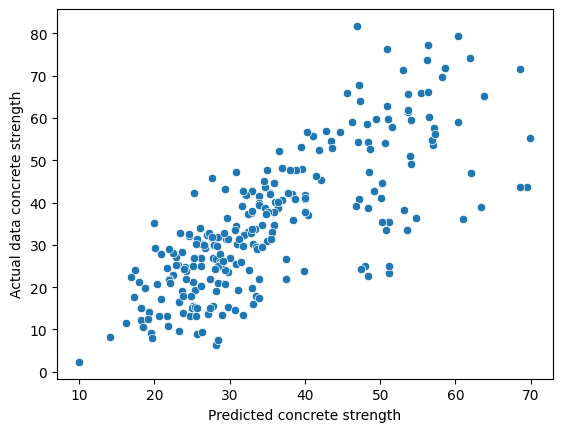

In [60]:
# Data visualization to compare predicted values against training data set 

sns.scatterplot(x=linear_pred, y=y_test)
plt.xlabel("Predicted concrete strength")
plt.ylabel("Actual data concrete strength")


The r2 score from using linear regression is quite low which can lead to underfitting.

# Model 2 using Lasso and Ridge 

In [45]:
from sklearn.linear_model import Lasso, Ridge 
la = Lasso().fit(X_train,y_train) # lasso model
ri = Ridge().fit(X_train,y_train) # ridge model


In [46]:
la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [47]:
# Lasso R^2, MSE metrics 
calculate_metrics(y_test, la_p) 

MSE:-  112.81240432921106
RMSE:-  10.621318389409625
R2_score:-  0.5985243999795309


In [48]:
# Rideg model  R^2, MSE metrics 
calculate_metrics(y_test, ri_p)

MSE:-  112.89668541206055
RMSE:-  10.625285192034168
R2_score:-  0.5982244613468197


# Model 3: SVR model 

In [52]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 


In [50]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train,y_train)
svr_pred =svr.predict(X_test)

In [53]:
svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.002 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [55]:
svr_pred = grid.predict(X_test)

In [56]:
calculate_metrics(y_test,svr_pred )

MSE:-  38.13016368216255
RMSE:-  6.174962646215971
R2_score:-  0.8643027738465543


Text(0, 0.5, 'Actual data concrete strength')

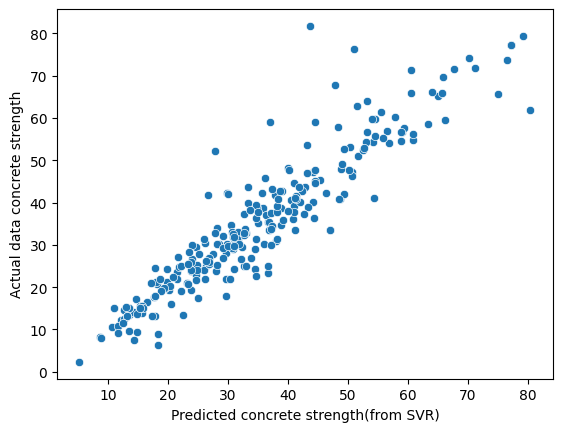

In [62]:
sns.scatterplot(x=svr_pred, y=y_test)
plt.xlabel("Predicted concrete strength(from SVR)")
plt.ylabel("Actual data concrete strength")


In conclusion, of all the three models used above for predicting strength of concrete mixture, SVR model gave us the best output with R2 of over 0.85.